In [10]:
import pandas as pd

libki = pd.read_csv("libki.csv")
libki.head()

,name,private,description,size,topics
0,boto3,False,AWS SDK for Python,9575,"['aws', 'aws-sdk', 'cloud', 'cloud-management'..."
1,urllib3,False,urllib3 is a user-friendly HTTP client library...,7605,"['http', 'http-client', 'python', 'urllib3']"
2,botocore,False,"The low-level, core functionality of boto3 and...",297352,[]
3,requests,False,"A simple, yet elegant, HTTP library.",13097,"['client', 'cookies', 'forhumans', 'http', 'hu..."
4,setuptools,False,Official project repository for the Setuptools...,46589,[]


In [11]:
libki = libki.sort_values(by="size", ascending = False)
libki.head()

,name,private,description,size,topics
254,pytorch,False,Tensors and Dynamic neural networks in Python ...,981192,"['autograd', 'deep-learning', 'gpu', 'machine-..."
90,azure-sdk-for-python,False,This repository is for active development of t...,689333,"['azure', 'azure-sdk', 'hacktoberfest', 'python']"
80,grpc,False,"The C based gRPC (C++, Python, Ruby, Objective...",534005,[]
238,spark,False,Apache Spark - A unified analytics engine for ...,474267,"['big-data', 'java', 'jdbc', 'python', 'r', 's..."
107,matplotlib,False,matplotlib: plotting with Python,455602,"['data-science', 'data-visualization', 'gtk', ..."


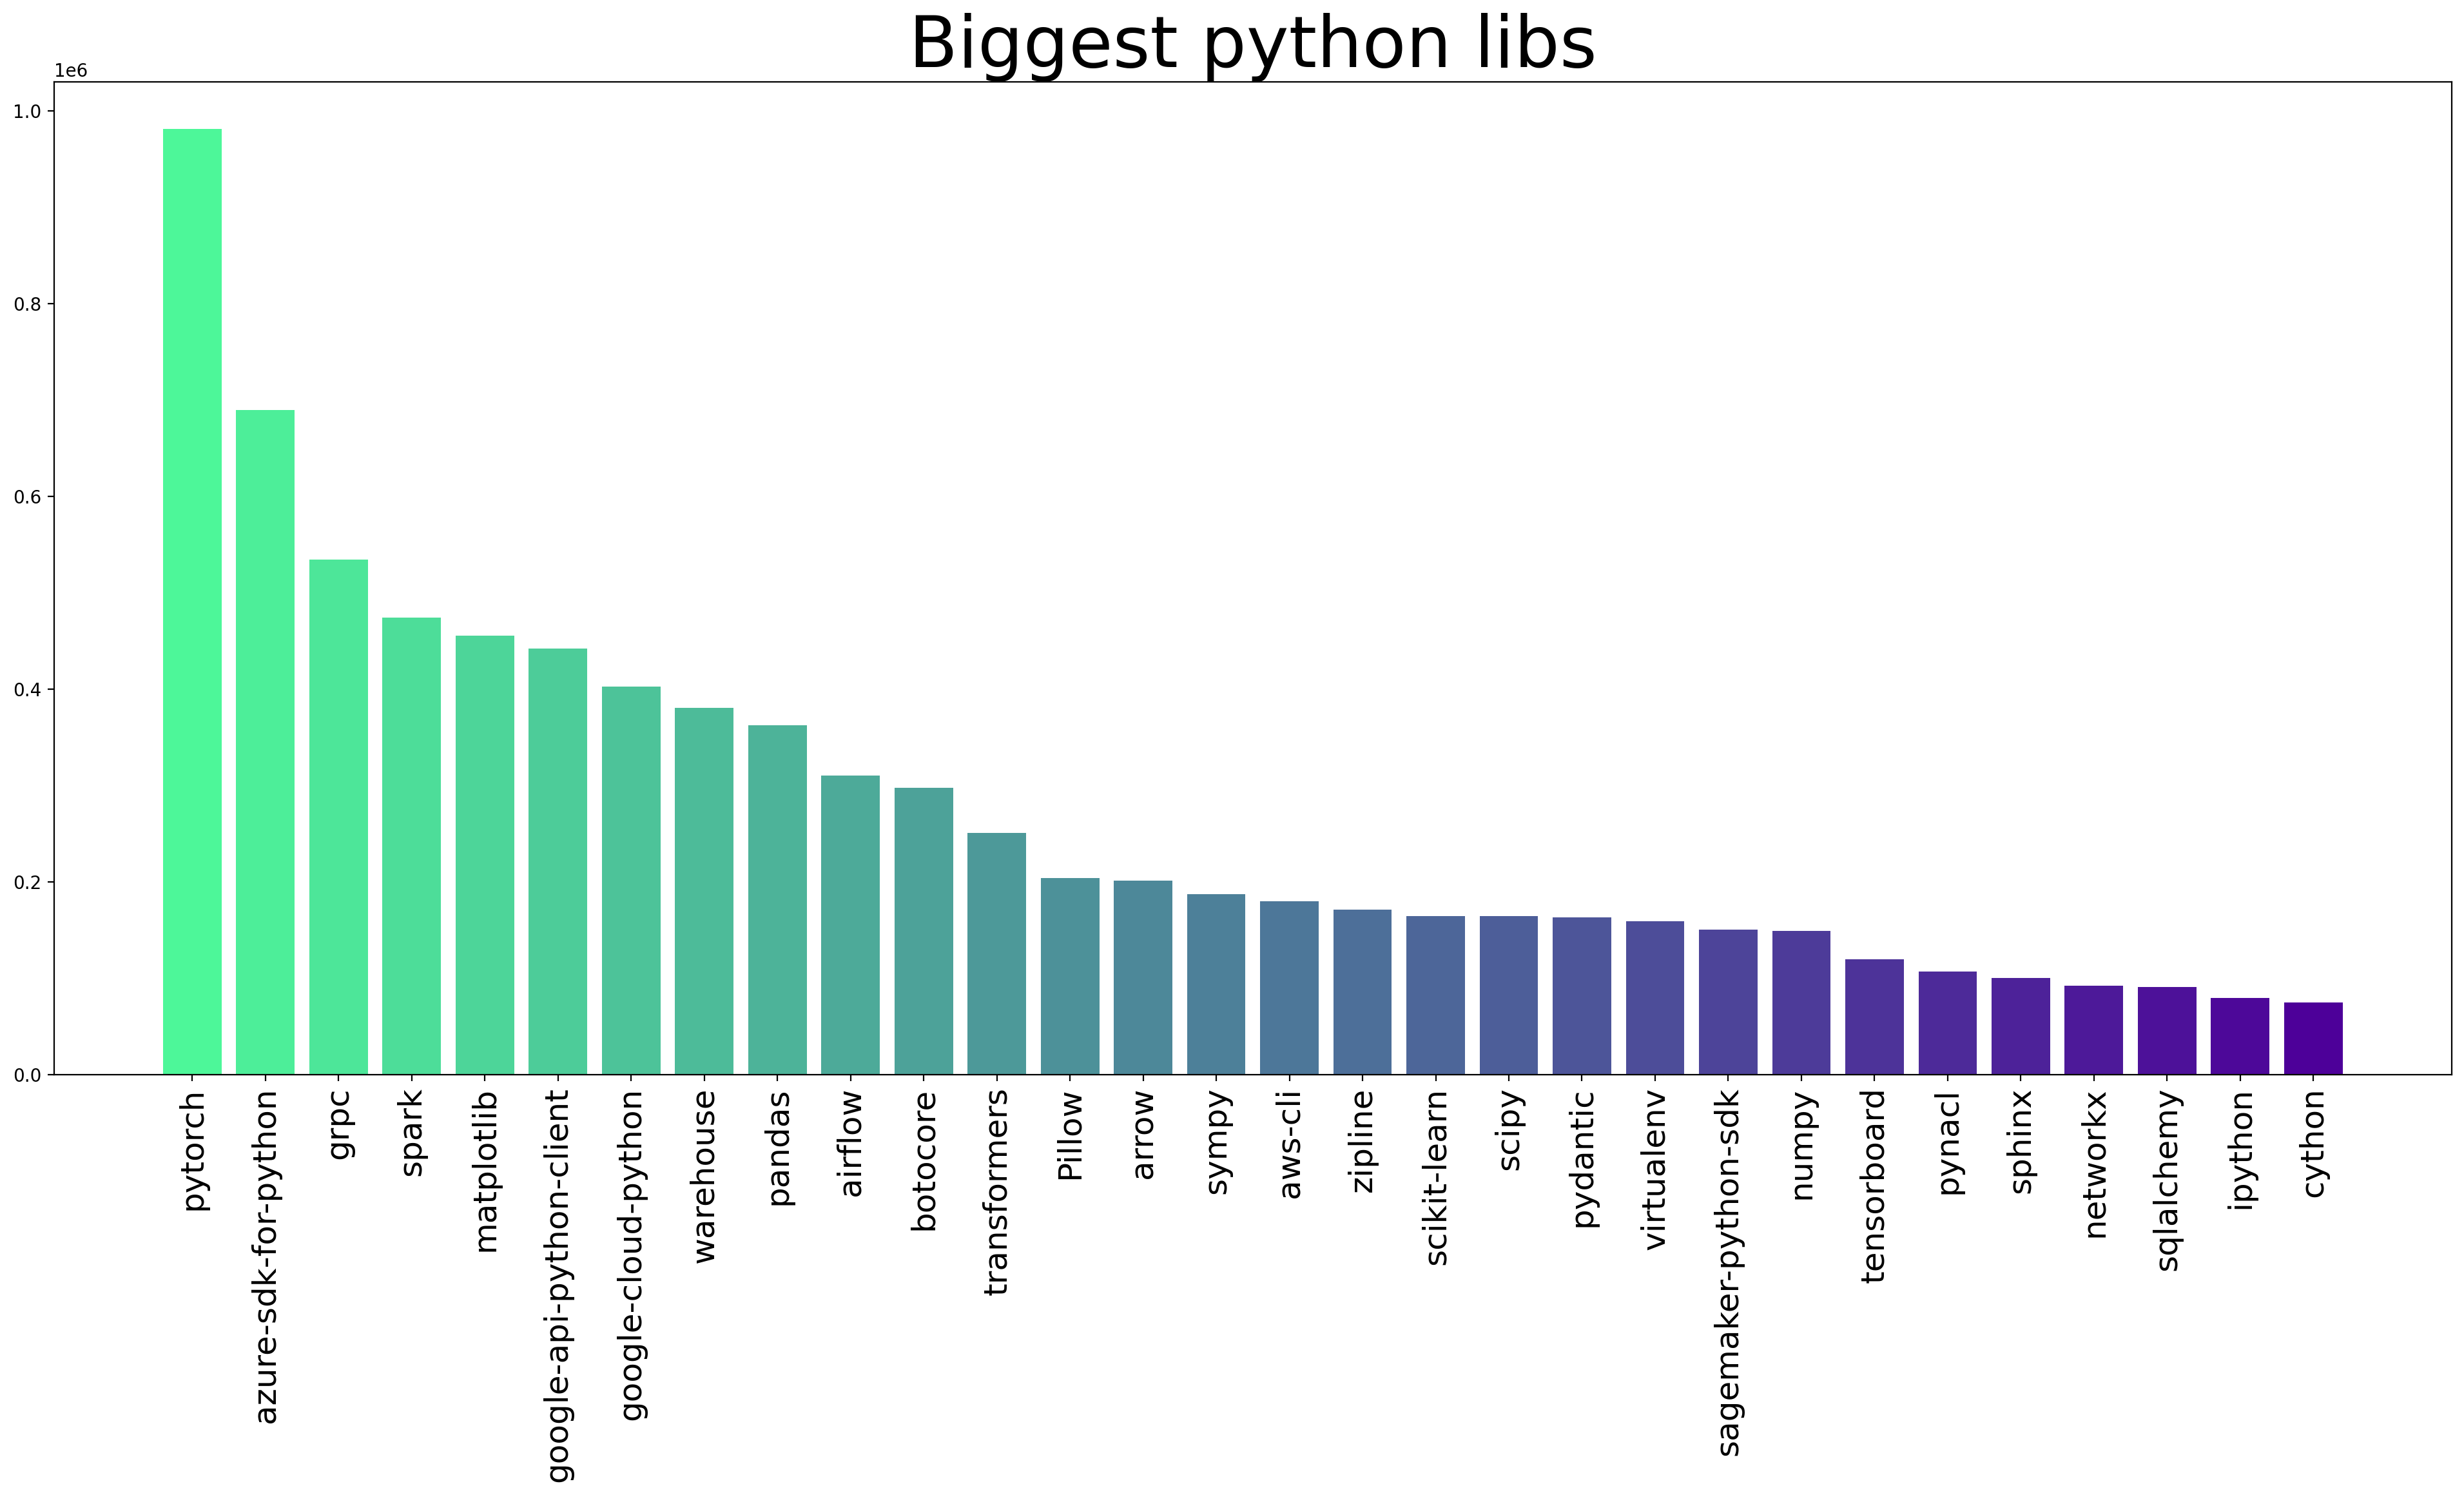

In [43]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(24, 10), dpi=200)

top = 30

colors = []

for i in range(top):
  colors.append((0.3, 1.0 - ((i + 1) / top), 0.6))

plt.title("Biggest python libs", fontsize = 40)
plt.bar(libki["name"][0:top], libki["size"][0:top], color = colors)
plt.xticks(rotation=90, fontsize=18)
plt.show()

### Most popular tags

In [57]:
!pip install circlify

In [164]:
import ast

tags = {}

for i in range(len(libki["topics"])):
  x = ast.literal_eval(libki["topics"][i])
  x = [n.strip() for n in x]
  for tag in x:
    if tag in tags:
      tags[tag.replace("-", "\n")] += 1
    else:
      tags[tag.replace("-", "\n")] = 1

x_dict = (dict(sorted(tags.items(), key=lambda item: item[1])))
x_dict = {k: v for k, v in tags.items() if v > 2}

df_xdict = pd.DataFrame.from_dict(x_dict, orient='index', columns=["value"])

print(max(x_dict.values()))
print(x_dict)

df_xdict.head()

137
{'aws': 6, 'cloud': 4, 'python': 137, 'http': 10, 'hacktoberfest': 27, 'datetime': 3, 'library': 4, 'parsing': 4, 'time': 4, 'timezones': 3, 'aiohttp': 5, 'asyncio': 13, 'cryptography': 6, 'packaging': 5, 'pandas': 3, 'pydantic': 3, 'validation': 5, 'cli': 6, 'pallets': 6, 'jinja': 3, 'schema': 3, 'cython': 3, 'python3': 13, 'async': 3, 'sql': 5, 'json': 5, 'closember': 5, 'terminal': 4, 'trio': 4, 'wsgi': 3, 'azure': 3, 'markdown': 5, 'database': 3, 'pep8': 3, 'linter': 4, 'pytorch': 3}


,value
aws,6
cloud,4
python,137
http,10
hacktoberfest,27


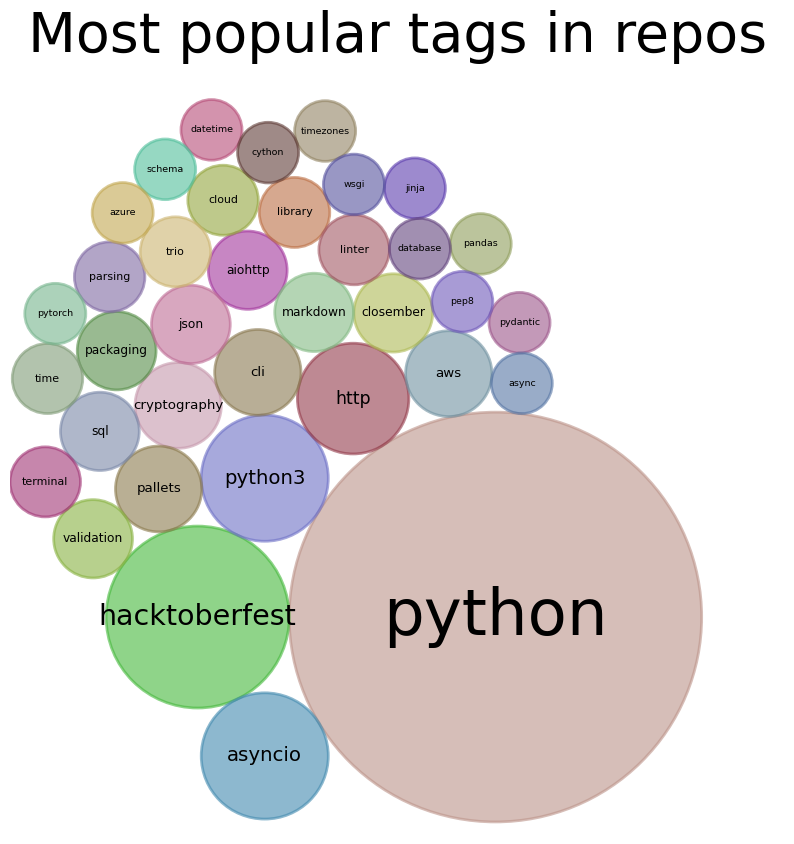

In [167]:
import random

# compute circle positions
circles = circlify.circlify(
    df_xdict['value'].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

max_r = max(x_dict.values())

# reverse the order of the circles to match the order of data
circles = circles[::-1]

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Most popular tags in repos', fontsize=40)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

def myFunc(e):
  return x_dict[e]

# list of labels
labels = df_xdict.index.tolist()
labels.sort(reverse=True, key=myFunc)

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.6, linewidth=2, color = ((random.uniform(0.2, 0.8)), (random.uniform(0.2, 0.8)), (random.uniform(0.2, 0.8)))))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center',
        fontsize= 90 * r
    )

## Agar.io plot weighted

In [171]:
import ast

tags = {}

for i in range(len(libki["topics"])):
  x = ast.literal_eval(libki["topics"][i])
  x = [n.strip() for n in x]
  for tag in x:
    if tag in tags:
      tags[tag.replace("-", "\n")] += libki["size"][i]
    else:
      tags[tag.replace("-", "\n")] = libki["size"][i]

print(tags)
print(max(tags.values()))
x_dict = (dict(sorted(tags.items(), key=lambda item: item[1])[-50:]))
print(max(x_dict.values()))

{'aws': 357416, 'aws\nsdk': 1083, 'cloud': 191732, 'cloud\nmanagement': 180004, 'python': 7283765, 'http': 87508, 'http\nclient': 3797, 'urllib3': 7605, 'client': 23486, 'cookies': 13097, 'forhumans': 13097, 'humans': 13097, 'python\nrequests': 807, 'requests': 13097, 'dns': 5106, 'hacktoberfest': 1591047, 'idna': 5106, 'unicode': 2401, 'chardet': 1365, 'charset\nconversion': 1365, 'charset\ndetection': 1365, 'encoding': 1365, 'datetime': 11053, 'library': 193747, 'parsing': 182948, 'time': 17123, 'timezones': 11053, 's3': 2718, 'package\nregistry': 380181, 'package\nrepository': 380181, 'pypi': 383536, 'pypi\nsource': 380181, 'aiohttp': 35136, 'asyncio': 74218, 'botocore': 1083, 'yaml': 838, 'numpy': 1130404, 'cryptography': 216639, 'packaging': 98799, 'pip': 71378, 'alignment': 362392, 'data\nanalysis': 931, 'data\nscience': 310498, 'flexible': 362392, 'pandas': 383747, 'hints': 162734, 'json\nschema': 24597, 'pydantic': 194309, 'python310': 162734, 'python311': 162734, 'python312': 

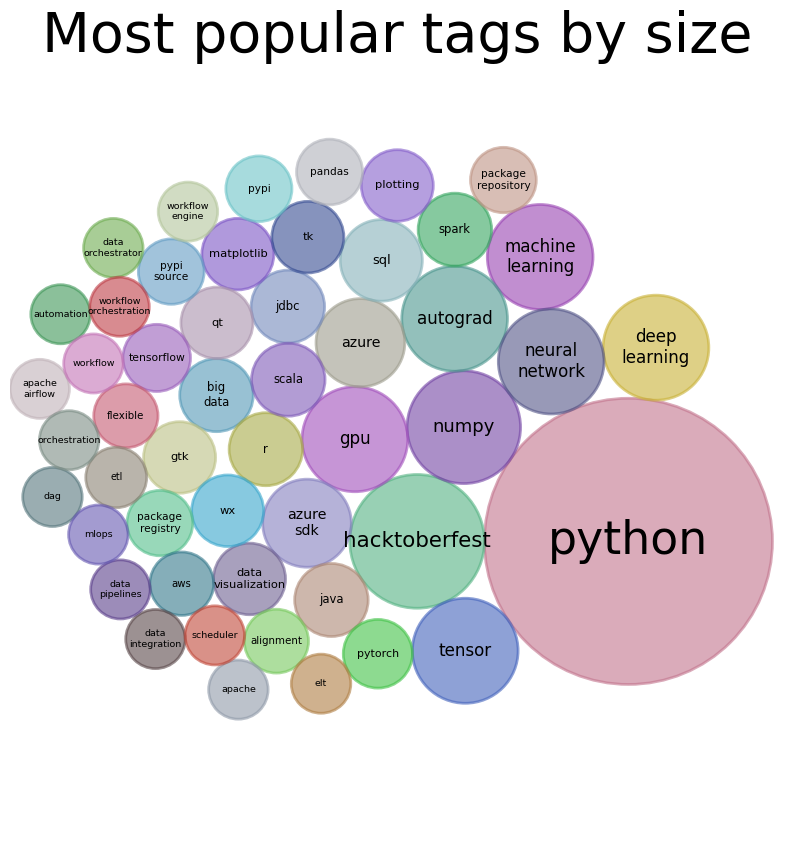

In [173]:
import random

# compute circle positions
circles = circlify.circlify(
    list(x_dict.values()),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

max_r = max(x_dict.values())

# reverse the order of the circles to match the order of data
circles = circles[::-1]

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10, 10))

# Title
ax.set_title('Most popular tags by size', fontsize=40)

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

def myFunc(e):
  return x_dict[e]

# list of labels
labels = list(x_dict.keys())
labels.sort(reverse=True, key=myFunc)

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.6, linewidth=2, color = ((random.uniform(0.2, 0.8)), (random.uniform(0.2, 0.8)), (random.uniform(0.2, 0.8)))))
    plt.annotate(
        label,
        (x, y),
        va='center',
        ha='center',
        fontsize= 90 * r
    )